# Problem 3 - Answers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import constants as CONSTANTS

Define the constants we'll use throughout. It's best practice to name constants in `ALL_CAPS`

In [2]:
M_EARTH = 5.972E24   # Mass of the earth
M_SUN = 1.98847E30   # Mass of the sun

AU = CONSTANTS.astronomical_unit
PI = CONSTANTS.pi
GRAV = CONSTANTS.gravitational_constant
YEAR = CONSTANTS.year

## Kepler's First Law

In [3]:
# Initial state vector for the planet
X0 = np.array([1 * AU, 0.0, 0.0, 35.0E3])

# Length of time to evaluate for in years
n_years = 20

# Time points at which to evaluate (using 100 points/year)
t_eval = np.linspace(0.0, n_years * YEAR, n_years * 100)

In [4]:
def update_function(t, X):
    
    # Get coordinates and velocity
    x_pos, y_pos, x_vel, y_vel = X
    
    # Calculate radial distance
    radial_dist = np.hypot(x_pos, y_pos)
    
    # Calculate each component of acceleration
    x_acc = - GRAV * M_SUN * x_pos / (radial_dist ** 3)
    y_acc = - GRAV * M_SUN * y_pos / (radial_dist ** 3)
    
    return [x_vel, y_vel, x_acc, y_acc]

In [5]:
# Integrate the equations
solution = solve_ivp(update_function, [0.0, t_eval[-1]], X0, method='Radau', t_eval=t_eval)

# Get the solution
x, y, vx, vy = solution.y

To find $a$ and $b$ we need to fit to something that looks like a line $v=mu+c$. We rearrange to get
$$ y^2 = b^2 - \frac{b^2}{a^2}x^2, $$
so if we fit to $v=y^2$ and $u=x^2$ we'll find $b=\sqrt{c}$ and $a=\sqrt{-c/m}$. This is okay because $m$ is negative.

We must also shift the coordinates so that the origin is the centre of the ellipse, not the sun (the focus of the ellipse). We find the x coordinate of the centre by finding the x coordinate where y is maximum.

In [6]:
# Prepare the data
v = y ** 2
u = (x - x[np.argmax(y)]) ** 2

In [7]:
# Perform the fit
m, c = np.polyfit(u, v, 1)

In [8]:
# Getting a and b, in units of AU
print("a=%.2f AU, b=%.2f AU" % (np.sqrt(- c / m) / AU, np.sqrt(c) / AU))
a, b = np.sqrt(- c / m) / AU, np.sqrt(c) / AU

a=1.61 AU, b=1.49 AU


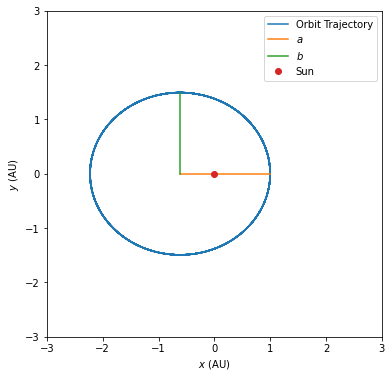

In [9]:
# Plot the orbit
fig, ax = plt.subplots(figsize=[6, 6])
ax.plot(x / AU, y / AU, label='Orbit Trajectory')

# Add the semi-minor/major axes as a check
ax.plot([x.max() / AU - a, x.max() / AU], [0.0, 0.0], label='$a$')
ax.plot([x.max() / AU - a, x.max() / AU - a], [0.0, b], label='$b$')

ax.plot([0.0], [0.0], 'o', label='Sun')
ax.set(xlabel='$x$ (AU)', ylabel='$y$ (AU)', xlim=[-3, 3], ylim=[-3, 3])
ax.legend()
plt.savefig('./kepler_example_orbit.pdf')
plt.show()